# CASA0007 Quantitative Methods Assignment 1

## Load required packages

In [158]:
# Load required libiaries
import sys
print(sys.version)
print(sys.executable)

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import statsmodels
print(statsmodels.__version__)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
/opt/conda/bin/python
0.13.2


## Description of the datasets

**Area_coverage**: London by Borough Level

**Time_coverage**: 2016

**Columns**:
1. 'crime_rate', data originally from [Recorded Crime: Borough Rates](https://data.london.gov.uk/dataset/recorded_crime_rates)
2. 'population_density', data originally from [Land Area and Population Density, Ward and Borough](https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough)
3. 'house_price', data originally from [Average House Prices by Borough, Ward, MSOA & LSOA](https://data.london.gov.uk/dataset/average-house-prices)
4. 'earning_below_LLW', data originally from [Employees earning below the London Living Wage (LLW)](https://data.london.gov.uk/dataset/earning-below-llw)
5. 'employment_score', data originally from [Indices of Deprivation](https://data.london.gov.uk/dataset/indices-of-deprivation)

Scatter plots, box plots and histagram plots by Peng

In [217]:
# Load data pre_processed
rawdata1 = pd.read_csv('https://raw.githubusercontent.com/Murphy829/CASA0007_QM_A1/main/final_dataset06122022.csv')

In [214]:
rawdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                32 non-null     object 
 1   Area_name           32 non-null     object 
 2   crime_rate          32 non-null     float64
 3   population_density  32 non-null     float64
 4   house_price         32 non-null     float64
 5   earning_below_LLW   32 non-null     float64
 6   employment_score    32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


In [215]:
rawdata1.head()

,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,86.5288,56.0455,245.5000,25.0000,0.1581
1,E09000003,Barnet,65.7851,43.7825,450.0000,28.3000,0.0887
2,E09000004,Bexley,52.2173,40.0078,285.0000,34.8000,0.0948
3,E09000005,Brent,80.6390,75.1402,415.0000,32.0000,0.1192
4,E09000006,Bromley,65.0656,21.6747,375.0000,27.2000,0.0864


In [216]:
# No null value
rawdata1.isnull().sum()

Code                  0
Area_name             0
crime_rate            0
population_density    0
house_price           0
earning_below_LLW     0
employment_score      0
dtype: int64

## Scatter plots

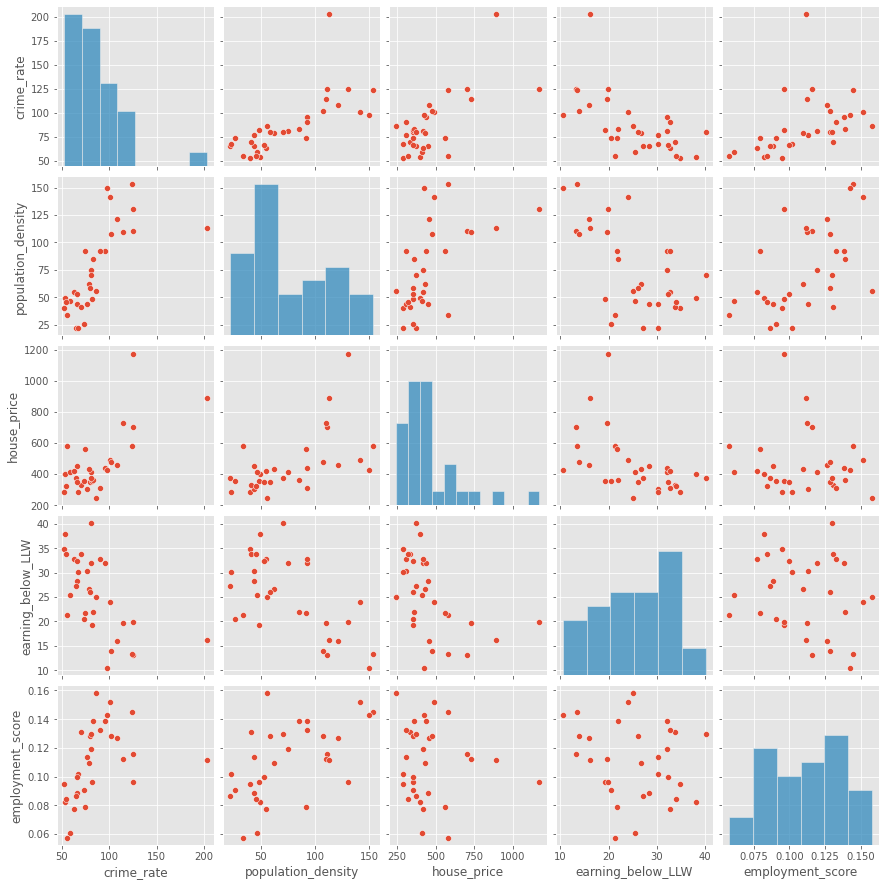

In [110]:
# Scatter plots
df = rawdata1
sn.pairplot(df[['crime_rate','population_density','house_price','earning_below_LLW','employment_score']])
plt.savefig("Pairplot.png")

## Heat map

In [111]:
# Pearson's correlation coefficient 
import scipy.stats as stats
import scipy
temp = df.iloc[:,2:]
ColNames = temp.columns
i=0
for col in temp.columns:
    correlation,pvalue=scipy.stats.pearsonr(df['crime_rate'], temp[col])
    print('crime_rate and :',ColNames[i],'correlation:',correlation,'pvalue:',pvalue)
    i=i+1

crime_rate and : crime_rate correlation: 1.0 pvalue: 0.0
crime_rate and : population_density correlation: 0.7148208171040408 pvalue: 4.2995819939218815e-06
crime_rate and : house_price correlation: 0.6901652942501736 pvalue: 1.2382803306494194e-05
crime_rate and : earning_below_LLW correlation: -0.6038055883868918 pvalue: 0.0002532588575471247
crime_rate and : employment_score correlation: 0.4316498115273955 pvalue: 0.013631522038001453


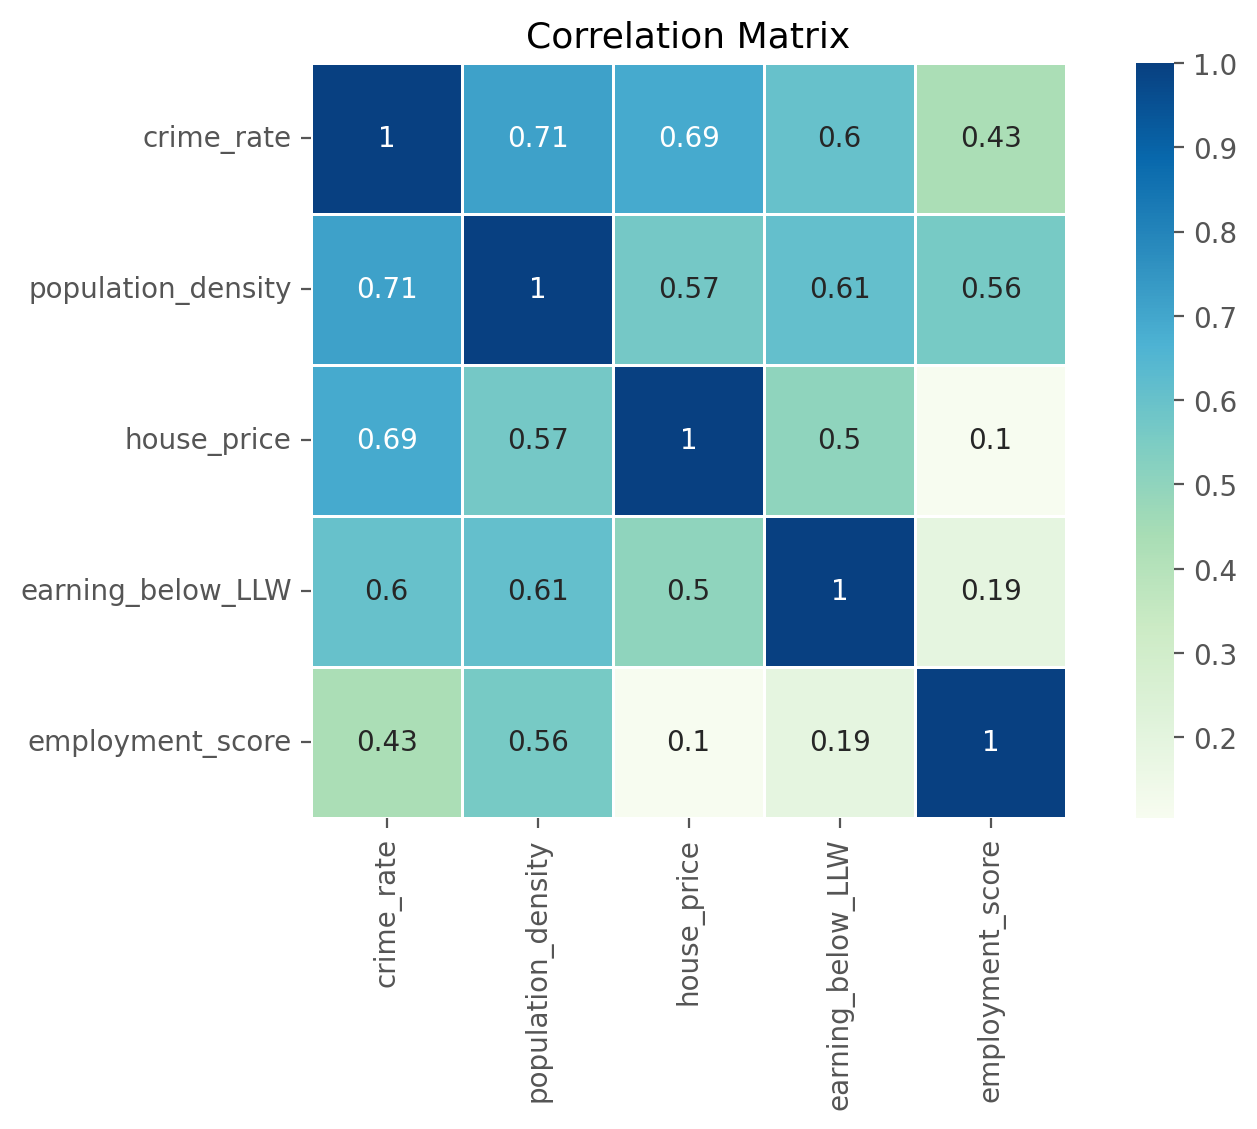

In [112]:
# Check the correlations
df = rawdata1
# Take absolute values
df_abs=df.corr().abs()
plt.figure(figsize=(9, 5),dpi=200)
plt.title('Correlation Matrix',fontdict={'fontsize':13})
sn.heatmap(df_abs, 
           cmap='GnBu',
           vmax=1,
           square=True,
           annot=True,
           linewidths=.5)
plt.savefig("Correlation Matrix.png")

## Heteroscedasticity detection

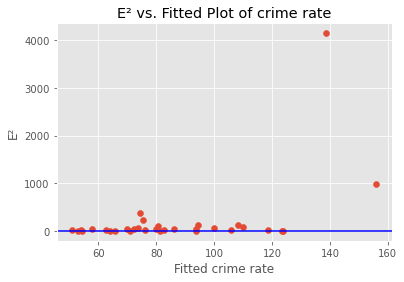

In [246]:
# Graphical test

model_res = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df).fit()

res = model_res.resid
fitted = model_res.fittedvalues
e2 = res**2

plt.scatter(fitted, e2)
# adding title and labels
plt.xlabel('Fitted crime rate')
plt.ylabel('E²')
plt.title('E² vs. Fitted Plot of crime rate')
plt.savefig("E²_vs_fit_crime_rate.png",dpi=400)
plt.axhline(y = 0.01, color = 'b',linestyle = '-')
plt.show()

In [206]:
df = df.drop(['resid_sq'],axis=1)

## Using VIF to deal with multicollinearity

In [ ]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

df_check = df[list(df.columns[3:])]
df_with_const = add_constant(df_check)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.0871
house_price,2.4558
earning_below_LLW,1.7003
employment_score,2.4148


In [122]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly 
    the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [248]:
# Drop collinear variables
df_new = drop_column_using_vif_(df.drop(['Code','Area_name','crime_rate'],axis=1))

In [148]:
# None of columns were dropped
df_new.head()

,population_density,house_price,earning_below_LLW,employment_score
0,-0.1319,-0.5286,-0.0996,0.8326
1,-0.5972,0.0806,0.2330,-0.6725
2,-0.3726,-0.4580,0.5244,-0.2822
3,0.1219,-0.1948,0.8850,0.3921
4,-0.7393,-0.2003,0.0585,-0.5204


In [249]:
# Check VIF again
df_with_const = add_constant(df_new)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.0871
house_price,2.4558
earning_below_LLW,1.7003
employment_score,2.4148


## Standardization and Normalization

Code by Wu data_analysis.ipynb

In [165]:
# Read data applying Standardization and Normalization
rawdata2 = pd.read_csv('https://raw.githubusercontent.com/Murphy829/CASA0007_QM_A1/main/data_std_nor.csv',index_col=0)
rawdata2.info()
rawdata2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                32 non-null     object 
 1   Area_name           32 non-null     object 
 2   crime_rate          32 non-null     float64
 3   population_density  32 non-null     float64
 4   house_price         32 non-null     float64
 5   earning_below_LLW   32 non-null     float64
 6   employment_score    32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.0+ KB


,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,0.0097,-0.1319,-0.5286,-0.0996,0.8326
1,E09000003,Barnet,-0.3609,-0.5972,0.0806,0.2330,-0.6725
2,E09000004,Bexley,-0.5447,-0.3726,-0.4580,0.5244,-0.2822
3,E09000005,Brent,-0.1015,0.1219,-0.1948,0.8850,0.3921
4,E09000006,Bromley,-0.3729,-0.7393,-0.2003,0.0585,-0.5204


## Checking the correlation between variables(OLS)

In [130]:
# build the model 1, using this equation to formalute the regression model
# 'crime_rate ~ population_density + house_price + earning_belo_LLW + employment_score'
model_crime_rate = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df).fit()
model_crime_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     21.55
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.44e-08
Time:                        04:34:48   Log-Likelihood:                -130.84
No. Observations:                  32   AIC:                             271.7
Df Residuals:                      27   BIC:                             279.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3828     24.387     -0.098      0.923     -52.421      47.655
population_density    -0.0853      0.148     -0.577      0.569      -0.389       0.218
house_price            0.1091      0.023      4.733      0.000       0.062       0.156
earning_below_LLW     -0.8448      0.470     -1.797      0.084      -1.810       0.120
employment_score     600.9811    167.698      3.584      0.001     256.894     945.068
==============================================================================
Omnibus:                       38.858   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.599
Skew:                           2.376   Prob(JB):                     9.01e-38
Kurtosis:                      13.265   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
# After data was standarded and normalized, build the model 2, using this equation to formalute the regression model
# 'crime_rate ~ population_density + house_price + earning_belo_LLW + employment_score'
df2 = rawdata2
model_crime_rate2 = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df2).fit()
model_crime_rate2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     21.25
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.14e-08
Time:                        04:52:38   Log-Likelihood:                 11.231
No. Observations:                  32   AIC:                            -12.46
Df Residuals:                      27   BIC:                            -5.132
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0226      0.033     -0.679      0.503      -0.091       0.046
population_density    -0.0216      0.126     -0.171      0.865      -0.281       0.237
house_price            0.4906      0.132      3.713      0.001       0.220       0.762
earning_below_LLW     -0.1778      0.078     -2.284      0.030      -0.338      -0.018
employment_score       0.4400      0.099      4.455      0.000       0.237       0.643
==============================================================================
Omnibus:                       11.759   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.382
Skew:                           0.911   Prob(JB):                     0.000753
Kurtosis:                       5.733   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df2.loc[:,['population_density', 'house_price', 'earning_below_LLW', 'employment_score']], df2.crime_rate)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)

Coefficients: 
 [-0.02161079  0.49063282 -0.17783019  0.44001546]
Intercept: 
 -0.0225814934061995


The regression equation of Model 2:  
**'crime_rate' = -0.0225814934061995 + -0.02161079 'population_density' + 0.49063282 'house_price' - 0.17783019 'earning_below_LLW' + 0.44001546 'employment_score'**

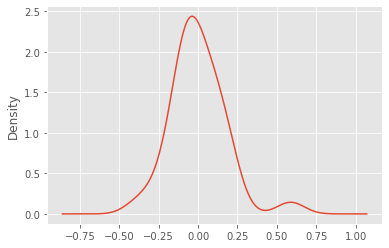

In [219]:
#  Residuals obey a positive distribution
plt.figure()
# ols.fit().model is a method to access to the residual.
model_crime_rate2.resid.plot.density()
plt.show()

## Interpreting a linear regression model

### Building the model

All VIF values are less than 5, there is no need to use funxtion named drop_column_using_vif_, so model_crime_rate2 was chosen

In [150]:
model_crime_rate2 = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df2).fit()
model_crime_rate2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     21.25
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.14e-08
Time:                        04:38:19   Log-Likelihood:                 11.231
No. Observations:                  32   AIC:                            -12.46
Df Residuals:                      27   BIC:                            -5.132
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0226      0.033     -0.679      0.503      -0.091       0.046
population_density    -0.0216      0.126     -0.171      0.865      -0.281       0.237
house_price            0.4906      0.132      3.713      0.001       0.220       0.762
earning_below_LLW     -0.1778      0.078     -2.284      0.030      -0.338      -0.018
employment_score       0.4400      0.099      4.455      0.000       0.237       0.643
==============================================================================
Omnibus:                       11.759   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.382
Skew:                           0.911   Prob(JB):                     0.000753
Kurtosis:                       5.733   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2 was the best regression model fit model.

The regression equation of Model 2, but the data was :  
**'crime_rate' = -0.0226  -0.0216 'population_density' + 0.4906 'house_price' - 0.1778 'earning_below_LLW' + 0.4400 'employment_score'**

### Residual analysis

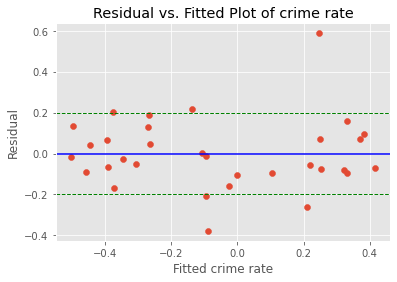

In [280]:
# Residual Analysis
plt.scatter(model_crime_rate2.fittedvalues, model_crime_rate2.resid)
# adding title and labels
plt.xlabel('Fitted crime rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of crime rate')
plt.savefig("Res_vs_fit_crime_rate.png",dpi=200)
plt.axhline(y = 0, color = 'b',linestyle = '-')
plt.axhline(y = 0.2, color = 'g',linestyle = '--',linewidth = 1)
plt.axhline(y = -0.2, color = 'g',linestyle = '--',linewidth = 1)
plt.show()

The distribution of the residuals is relatively uniform. The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable. The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


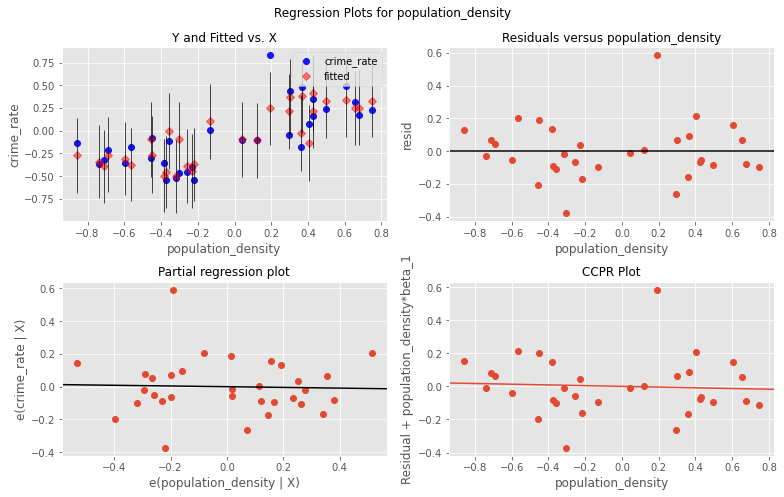

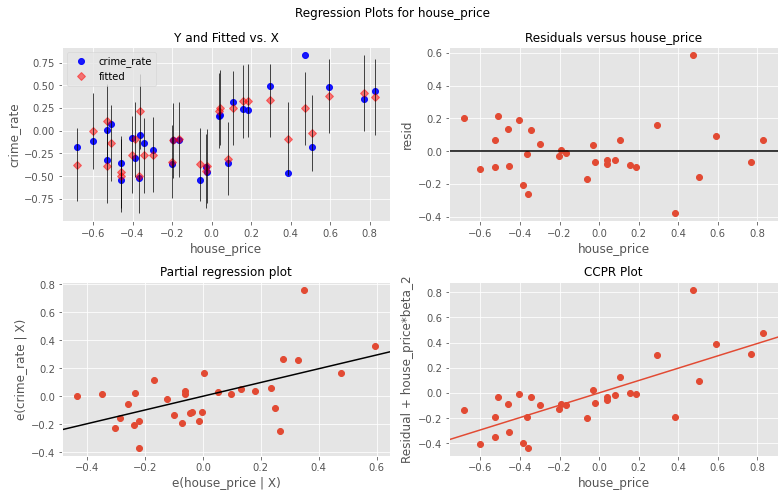

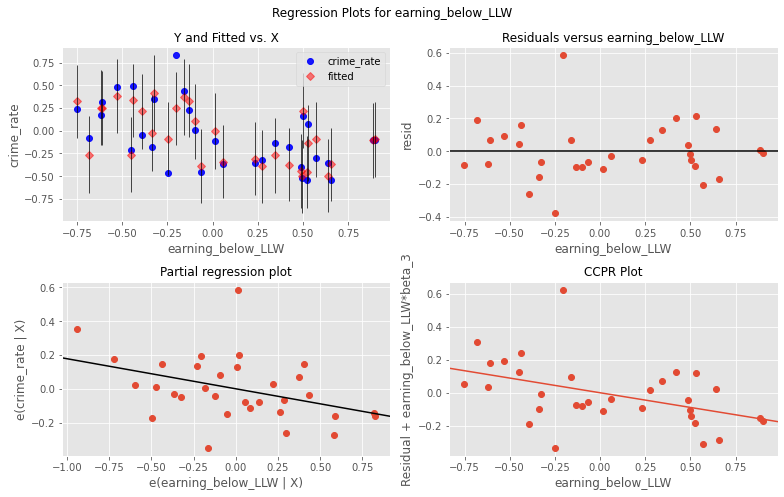

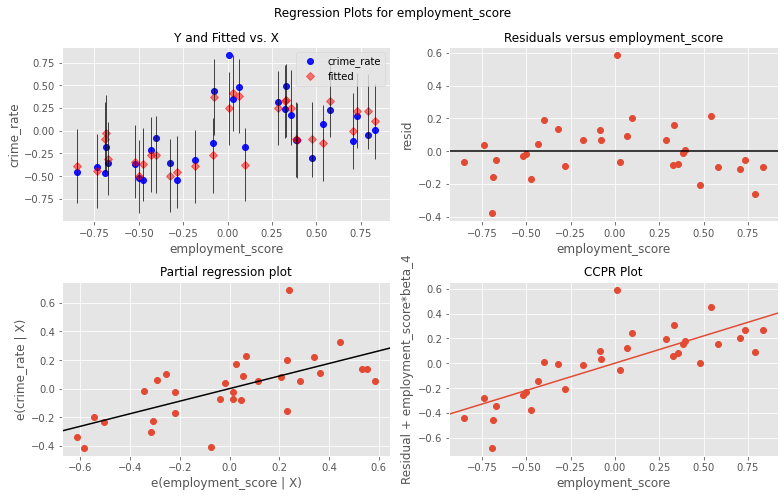

In [209]:
# More residual analysis plots ？

df2_new = df2.drop(['Code','Area_name','crime_rate'],axis=1)

column_names = df2_new.columns.values.tolist()
for i in column_names:
    fig = plt.figure(figsize=(11,7))
    fig = sm.graphics.plot_regress_exog(model_crime_rate2, i, fig=fig)
    plt.savefig(i+"_fit_vs_Res.png")

### Interpreting the model

The R-squared value is 0.759, meaning that 75.9% of the total variance of the crime rate can be explained by the variables used in the model.

In [251]:
rawdata1.head()

,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,86.5288,56.0455,245.5000,25.0000,0.1581
1,E09000003,Barnet,65.7851,43.7825,450.0000,28.3000,0.0887
2,E09000004,Bexley,52.2173,40.0078,285.0000,34.8000,0.0948
3,E09000005,Brent,80.6390,75.1402,415.0000,32.0000,0.1192
4,E09000006,Bromley,65.0656,21.6747,375.0000,27.2000,0.0864


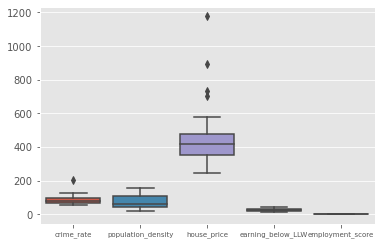

In [279]:

box1 = sn.boxplot(data=rawdata1)


box1.set_xticklabels(labels = ['crime_rate','population_density','house_price','earning_below_LLW','employment_score'],
                                    fontsize = 7)



plt.savefig("Boxplot.png",dpi=400)


In [252]:
rawdata2.head()

,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,0.0097,-0.1319,-0.5286,-0.0996,0.8326
1,E09000003,Barnet,-0.3609,-0.5972,0.0806,0.2330,-0.6725
2,E09000004,Bexley,-0.5447,-0.3726,-0.4580,0.5244,-0.2822
3,E09000005,Brent,-0.1015,0.1219,-0.1948,0.8850,0.3921
4,E09000006,Bromley,-0.3729,-0.7393,-0.2003,0.0585,-0.5204


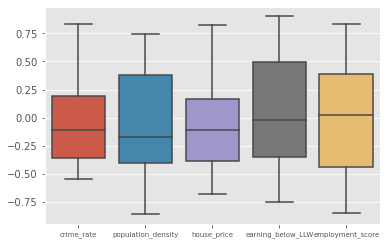

In [278]:
box2 = sn.boxplot(data=rawdata2)

box2.set_xticklabels(labels = ['crime_rate','population_density','house_price','earning_below_LLW','employment_score'],
                                    fontsize = 7)


plt.savefig("Boxplot2.png",dpi=400)

